In [47]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
import seaborn as sns
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import *
import random
sns.set_style("darkgrid")
plt.rcParams.update({'figure.max_open_warning': 0})

In [48]:
n = pd.read_csv("data.csv")
m = pd.read_csv("data2.csv")

In [49]:
n = np.array(n.iloc[:, -1])

In [50]:
m = np.array(m.iloc[:, -1])

In [51]:
arr = np.ndarray((len(n),2))

In [52]:
arr[:, 0] = n

In [53]:
arr[:, 1] = m

In [54]:
c = coint_johansen(arr, 0, 1)

In [55]:
np.set_printoptions(suppress=True)


In [56]:
print(c.trace_stat)
print(c.cvt)

[10.063018   0.0001602]
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [57]:
print(c.lr2)
print(c.cvm)

[10.0628578  0.0001602]
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()
l = model.fit(arr[:, 1].reshape((-1, 1)), arr[:, 0].reshape((-1, 1)))

In [60]:
print(l.coef_, l.intercept_)

[[2.41965312]] [-6.63633859]


In [61]:
pred = arr[:, 1] * l.coef_ + l.intercept_


In [62]:
pred = pred.reshape(-1)

In [63]:
df = pd.DataFrame(pred, columns = ["pred"])
df2 = pd.DataFrame(arr[:, 0], columns = ["actual"])
df3 = pd.DataFrame(arr[:, 1], columns = ["base"])
d = pd.concat([df, df2, df3], axis = 1)

In [64]:
d

,pred,actual,base
0,5.937991,5.991281,5.196749
1,5.907085,5.948548,5.183976
2,5.841851,5.893594,5.157016
3,5.801118,5.871836,5.140182
4,5.803509,5.835746,5.141170
...,...,...,...
246,5.172089,4.813403,4.880215
247,5.138273,4.692265,4.866240
248,5.062862,4.724818,4.835074
249,5.130445,4.802545,4.863004


<AxesSubplot:>

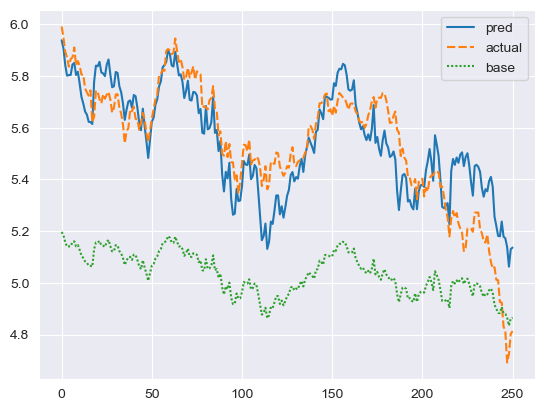

: 

In [65]:
sns.lineplot(data = d)